<a href="https://colab.research.google.com/github/KarinaSelingardi/ESTUDOS-DE-PYTHON/blob/main/Rede_neural1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Creating data set

# A
a =[1, 1, 1, 1, 1, 1,
   0, 1, 0, 0, 1, 0,
   1, 1, 1, 0, 1, 1,
   1, 0, 0, 0, 0, 1,
   1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 0, 0, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
   0, 0, 0, 0, 0, 0,
   0, 1, 0, 1, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 0, 0, 1, 1, 0]

# Creating labels

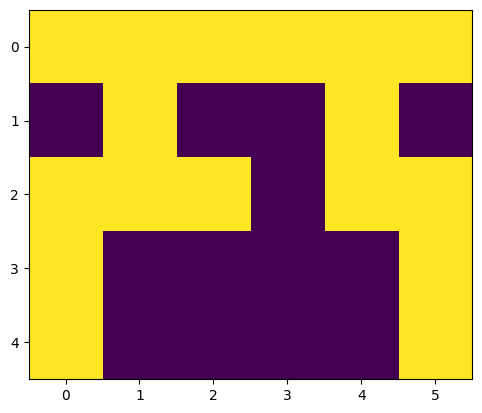

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, ploting A.
plt.imshow(np.array(a).reshape(5, 6))
plt.show()

In [ ]:
# converting data and labels into numpy array

"""
Convert the matrix of 0 and 1 into one hot vector
so that we can directly feed it to the neural network,
these vectors are then stored in a list x.
"""

x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30),
                                np.array(c).reshape(1, 30)]

y =np.array(c)


print(x, "\n\n", c)

[array([[1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0]])] 

 [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]


In [ ]:
# activation function

def sigmoid(x):
    return(1/(1 + np.exp(-x)))

# Creating the Feed forward neural network
# 1 Input layer(1, 30)
# 1 hidden layer (1, 5)
# 1 output layer(3, 3)

def f_forward(x, w1, w2):
    # hidden
    z1 = x.dot(w1)# input from layer 1
    a1 = sigmoid(z1)# out put of layer 2

    # Output layer
    z2 = a1.dot(w2)# input of out layer
    a2 = sigmoid(z2)# output of out layer
    return(a2)

# initializing the weights randomly
def generate_wt(x, y):
    l =[]
    for i in range(x * y):
        l.append(np.random.randn())
    return(np.array(l).reshape(x, y))

# for loss we will be using mean square error(MSE)
def loss(out, Y):
    s =(np.square(out-Y))
    s = np.sum(s)/len(y)
    return(s)

# Back propagation of error
def back_prop(x, y, w1, w2, alpha):

    # hidden layer
    z1 = x.dot(w1)# input from layer 1
    a1 = sigmoid(z1)# output of layer 2

    # Output layer
    z2 = a1.dot(w2)# input of out layer
    a2 = sigmoid(z2)# output of out layer
    # error in output layer
    d2 =(a2-y)
    d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),
                                   (np.multiply(a1, 1-a1)))

    # Gradient for w1 and w2
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)

    # Updating parameters
    w1 = w1-(alpha*(w1_adj))
    w2 = w2-(alpha*(w2_adj))

    return(w1, w2)

def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
    acc =[]
    losss =[]
    for j in range(epoch):
        l =[]
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2)
            l.append((loss(out, Y[i])))
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
        print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)
        acc.append((1-(sum(l)/len(x)))*100)
        losss.append(sum(l)/len(x))
    return(acc, losss, w1, w2)

def predict(x, w1, w2):
    Out = f_forward(x, w1, w2)
    maxm = 0
    k = 0
    for i in range(len(Out[0])):
        if(maxm<Out[0][i]):
            maxm = Out[0][i]
            k = i
    if(k == 0):
        print("Image is of letter A.")
    elif(k == 1):
        print("Image is of letter B.")
    else:
        print("Image is of letter C.")
    plt.imshow(x.reshape(5, 6))
    plt.show()


In [ ]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)

[[-1.09501307  0.67235855  0.1209409  -1.08606759 -0.84338086]
 [ 0.0497773  -0.20077526  0.01219914  0.9452738   1.01190847]
 [ 0.66599163  0.85487518  0.21801632 -0.11430702 -0.30323459]
 [-1.82352698  0.1291337   1.06737291 -1.78771693 -1.11317695]
 [-2.38250398  0.21932177 -1.40167767 -0.60503917  0.12559035]
 [ 0.13535819 -0.24122338 -0.20486542  0.06807505 -0.28014861]
 [ 1.46822502 -0.19392093 -0.12698683  0.90973795  0.98192281]
 [-0.92851155 -0.71214222  0.71111897  1.12332965  0.50091011]
 [-0.48946438  0.82793156 -0.2823416   0.50775559 -0.17981748]
 [-0.4678877   1.29954146  0.67700336  0.02568178 -0.68659244]
 [-0.52905976  0.27071655  0.20385131  1.57332587  1.09039125]
 [-0.61254677  0.53753364 -0.19680649  0.11033983  0.21150211]
 [ 0.76577169 -0.4454971   1.20114797  0.02387638 -0.81562422]
 [-0.53897105 -1.13188903  2.59282093 -0.7600305   1.28140185]
 [ 1.56242146  1.85196432 -1.67672321  1.26009062 -1.16131902]
 [ 1.09931145 -0.49258231 -0.2135195   0.74417155 -0.25

In [ ]:
"""The arguments of train function are data set list x,
correct labels y, weights w1, w2, learning rate = 0.1,
no of epochs or iteration.The function will return the
matrix of accuracy and loss and also the matrix of
trained weights w1, w2"""

acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

epochs: 1 ======== acc: 97.22870047725581
epochs: 2 ======== acc: 97.59551425819672
epochs: 3 ======== acc: 97.90951990942082
epochs: 4 ======== acc: 98.1766569948367
epochs: 5 ======== acc: 98.39912908649872
epochs: 6 ======== acc: 98.580560378406
epochs: 7 ======== acc: 98.72672497748232
epochs: 8 ======== acc: 98.84419186922938
epochs: 9 ======== acc: 98.93906562034621
epochs: 10 ======== acc: 99.01644885888614
epochs: 11 ======== acc: 99.080403611236
epochs: 12 ======== acc: 99.1340952132396
epochs: 13 ======== acc: 99.17995744899306
epochs: 14 ======== acc: 99.21983711882321
epochs: 15 ======== acc: 99.25511776285565
epochs: 16 ======== acc: 99.28682553876735
epochs: 17 ======== acc: 99.31571727834815
epochs: 18 ======== acc: 99.34235063997899
epochs: 19 ======== acc: 99.36713780581123
epochs: 20 ======== acc: 99.3903853698711
epochs: 21 ======== acc: 99.41232339846982
epochs: 22 ======== acc: 99.43312637611044
epochs: 23 ======== acc: 99.45292823777314
epochs: 24 ======== acc: 99

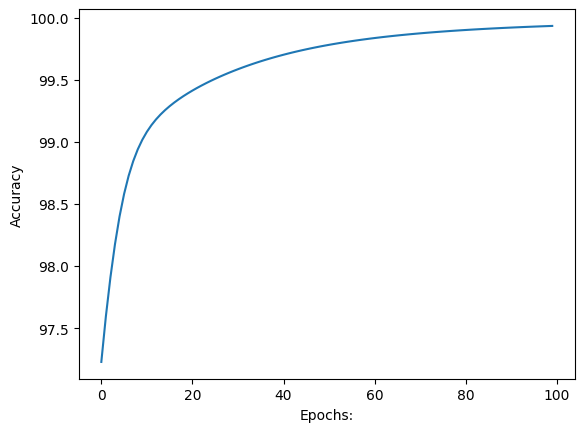

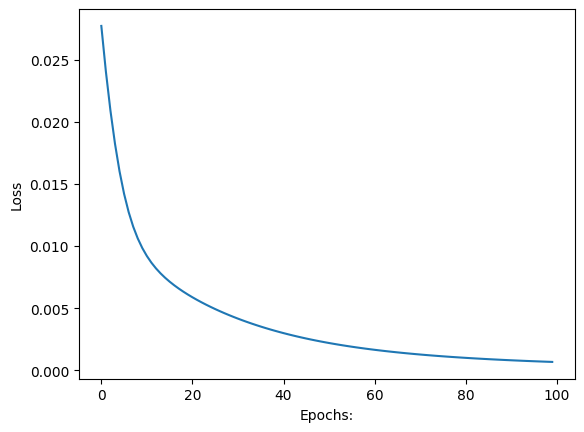

In [ ]:
import matplotlib.pyplot as plt1

# ploting accuraccy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()

# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

In [ ]:
# the trained weigths are
print(w1, "\n", w2)

[[-1.11043895  0.31523465  0.37101252 -0.96164333 -1.18315029]
 [ 0.07828238  0.09637362  0.21882346  0.89387047  1.03936459]
 [ 0.69449671  1.15202407  0.42464064 -0.16571035 -0.27577847]
 [-1.7950219   0.42628258  1.27399724 -1.83912026 -1.08572083]
 [-2.3539989   0.51647065 -1.19505334 -0.6564425   0.15304647]
 [ 0.11993231 -0.59834728  0.04520619  0.19249931 -0.61991803]
 [ 1.46822502 -0.19392093 -0.12698683  0.90973795  0.98192281]
 [-0.93894336 -1.06015243  0.92424137  1.23082526  0.16921228]
 [-0.48946438  0.82793156 -0.2823416   0.50775559 -0.17981748]
 [-0.4678877   1.29954146  0.67700336  0.02568178 -0.68659244]
 [-0.53949157 -0.07729367  0.41697372  1.68082148  0.75869342]
 [-0.61254677  0.53753364 -0.19680649  0.11033983  0.21150211]
 [ 0.75034581 -0.802621    1.45121959  0.14830063 -1.15539364]
 [-0.51046597 -0.83474014  2.79944526 -0.81143383  1.30885797]
 [ 1.55198965  1.5039541  -1.46360081  1.36758622 -1.49301685]
 [ 1.13824833  0.15257679 -0.22001757  0.58527261  0.10

Image is of letter C.


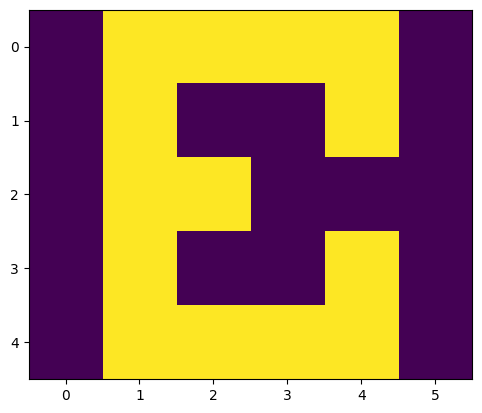

In [ ]:
"""
The predict function will take the following arguments:
1) image matrix
2) w1 trained weights
3) w2 trained weights
"""
predict(x[1], w1, w2)